In [1]:
import pandas
from statsmodels.formula.api import glm
from statsmodels.genmod.families.family import Binomial

In [2]:
burnout = pandas.read_csv('burnout.csv')

In [12]:
burnout.head()

,burnout,loc,cope,teaching,research,pastoral,y
0,Not Burnt Out,7.647059,9.160305,32.727273,87.500000,31.481481,0
1,Not Burnt Out,6.470588,12.977099,52.727273,66.666667,68.518519,0
2,Not Burnt Out,8.823529,9.160305,49.090909,60.416667,53.703704,0
3,Not Burnt Out,20.000000,9.160305,52.727273,62.500000,50.000000,0
4,Not Burnt Out,6.470588,19.083969,43.636364,79.166667,40.740741,0


In [6]:
burnout['y'] = burnout['burnout'].replace({'Burnt Out': 1, 'Not Burnt Out': 0})

In [76]:
res = glm('y ~ teaching * cope', burnout, family=Binomial()).fit()

In [77]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  467
Model:                            GLM   Df Residuals:                      463
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.25
Date:                Tue, 01 Oct 2019   Deviance:                       354.51
Time:                        17:29:17   Pearson chi2:                     357.
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.4114      1.359     -6.187      0.000     -11.076      -5.747
teaching          0.0684      0.023      2.987      0.003       0.024       0.113
cope              0.3287      0.042      7.736      0.000       0.245       0.412
teaching:cope    -0.0033      0.001     -5.802      0.000      -0.004      -0.002
=================================================================================
"""

In [19]:
res.aic

399.09191057022167

In [16]:
res.bic

-2363.440589787294

## 예측

In [23]:
prob = res.predict(burnout)  # 원칙적으로 새 데이터

In [28]:
prob

0      0.015454
1      0.057103
2      0.028438
3      0.032525
4      0.128978
5      0.071993
6      0.064055
7      0.017632
8      0.021708
9      0.068946
10     0.059011
11     0.055814
12     0.522091
13     0.020698
14     0.153810
15     0.032162
16     0.013035
17     0.024852
18     0.018234
19     0.056376
20     0.048675
21     0.032519
22     0.053497
23     0.136668
24     0.283889
25     0.086794
26     0.028816
27     0.581702
28     0.036356
29     0.029362
         ...   
437    0.844417
438    0.865184
439    0.686455
440    0.795034
441    0.678996
442    0.742122
443    0.784353
444    0.682414
445    0.211446
446    0.768241
447    0.460667
448    0.631640
449    0.802389
450    0.907775
451    0.673587
452    0.944201
453    0.666746
454    0.867725
455    0.626040
456    0.990357
457    0.487489
458    0.920528
459    0.971019
460    0.975428
461    0.894815
462    0.694301
463    0.933334
464    0.506838
465    0.772203
466    0.342818
Length: 467, dtype: floa

In [26]:
import numpy

In [27]:
pred = numpy.where(prob > .5, 1, 0) # threshold = .5

## 혼돈행렬

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
true = burnout['y']
confusion_matrix(true, pred)

array([[311,  37],
       [ 58,  61]], dtype=int64)

```
                        예측
                      Not Burnt Out(0)     Burnt Out(1)
실제  Not Burnt Out           321              27  
       Burnt Out               72              47
        
```   

## 정확도, 정밀도, 재현도

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [35]:
accuracy_score(true, pred)

0.7965738758029979

In [36]:
precision_score(true, pred, pos_label=1)

0.6224489795918368

In [37]:
recall_score(true, pred, pos_label=1)

0.5126050420168067

## ROC 곡선

In [38]:
from sklearn.metrics import roc_curve, auc

In [39]:
fpr, tpr, threshold = roc_curve(true, prob, pos_label=1)

In [40]:
import seaborn

In [44]:
pandas.DataFrame({'fpr': fpr, 'tpr': tpr, 't': threshold}) 

,fpr,tpr,t
0,0.000000,0.000000,1.990357
1,0.000000,0.008403,0.990357
2,0.000000,0.033613,0.959496
3,0.002874,0.033613,0.949422
4,0.002874,0.075630,0.920528
5,0.005747,0.075630,0.916035
6,0.005747,0.092437,0.907775
7,0.005747,0.100840,0.894815
8,0.005747,0.117647,0.867725
9,0.005747,0.126050,0.865184


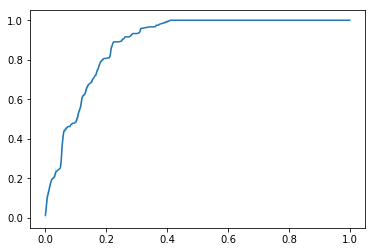

In [41]:
seaborn.lineplot(fpr, tpr)

In [42]:
auc(fpr, tpr)

0.8856732348111658

## 클러스터링

In [45]:
wine = pandas.read_csv('wine.csv')

In [46]:
wine.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
data = wine.iloc[:, 1:]  # iloc: 번호로 위치를 지정, : 모든 행, 1: = 1열부터 

- Min-Max Scaling: 최소값은 0, 최대값은 1이 되도록 조정
- 표준화(Standardization): 모든 값에서 평균을 빼고, 표준편차로 나눠주는 것

In [48]:
data.head()

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 표준화

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale = StandardScaler()

In [55]:
scale.fit(data)

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
x = scale.transform(data)

C:\Users\eupho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [58]:
pandas.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=3)  # 데이터를 3개의 클러스터로 묶음

In [12]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
wine['Class'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [13]:
km.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [61]:
from sklearn.cluster import AffinityPropagation

In [62]:
ap = AffinityPropagation(preference=-200)

In [63]:
ap.fit(x)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=-200, verbose=False)

In [64]:
ap.predict(x)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [65]:
from sklearn.cluster import MeanShift

In [66]:
ms = MeanShift(bandwidth=3)

In [67]:
ms.fit(x)

MeanShift(bandwidth=3, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [68]:
ms.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 5, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       9, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 8, 4, 4, 4, 0, 0, 0, 0, 4, 7, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [213]:
from sklearn.cluster import SpectralClustering

In [214]:
sc = SpectralClustering(n_clusters=3)

In [217]:
sc.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [218]:
from sklearn.cluster import AgglomerativeClustering

In [220]:
ac = AgglomerativeClustering(n_clusters=3)

In [221]:
ac.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [71]:
from sklearn.cluster import DBSCAN

In [74]:
ds = DBSCAN(eps=3, min_samples=5)

In [75]:
ds.fit_predict(x)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [238]:
import sklearn

In [239]:
sklearn.__version__

'0.20.3'

In [18]:
labels_km = km.predict(x)

In [25]:
labels_ap = ap.predict(x)

In [28]:
from sklearn.metrics import davies_bouldin_score

In [29]:
davies_bouldin_score(x, labels_km)

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.389187977718165

In [30]:
davies_bouldin_score(x, labels_ap)

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.4523177938566059

In [14]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(x, labels_km)

0.2848589191898987

In [26]:
silhouette_score(x, labels_ap)

0.2511804643887535